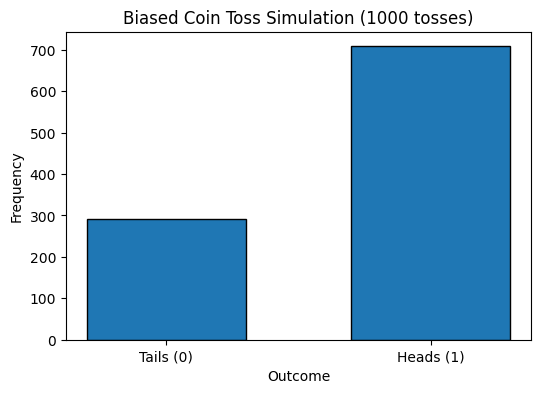

Observed Probabilities:
Heads: 0.708, Tails: 0.292
Theoretical Probabilities:
Heads: 0.7, Tails: 0.3


In [3]:


# Simulate 1000 tosses of a biased coin that shows heads (H) with probability 0.7 and tails (T) with probability 0.3.

# Plot a histogram of the outcomes.

# Compare the observed probabilities with the theoretical probabilities (0.7 and 0.3).


import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
n_tosses = 1000
p_heads = 0.7
p_tails = 0.3

# Simulate coin tosses (0 = Tails, 1 = Heads)
tosses = np.random.choice([1, 0], size=n_tosses, p=[p_heads, p_tails])

# Count outcomes
heads_count = np.sum(tosses == 1)
tails_count = np.sum(tosses == 0)

# Observed probabilities
obs_heads_prob = heads_count / n_tosses
obs_tails_prob = tails_count / n_tosses

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(tosses, bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.6)
plt.xticks([0, 1], ["Tails (0)", "Heads (1)"])
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Biased Coin Toss Simulation (1000 tosses)")
plt.show()

# Print comparison
print("Observed Probabilities:")
print(f"Heads: {obs_heads_prob:.3f}, Tails: {obs_tails_prob:.3f}")
print("Theoretical Probabilities:")
print(f"Heads: {p_heads}, Tails: {p_tails}")



# Simulates 1000 coin tosses with np.random.choice.

# Counts heads and tails.

# Computes observed probabilities.

# Plots a histogram of the outcomes.

# Prints comparison between observed and theoretical probabilities.

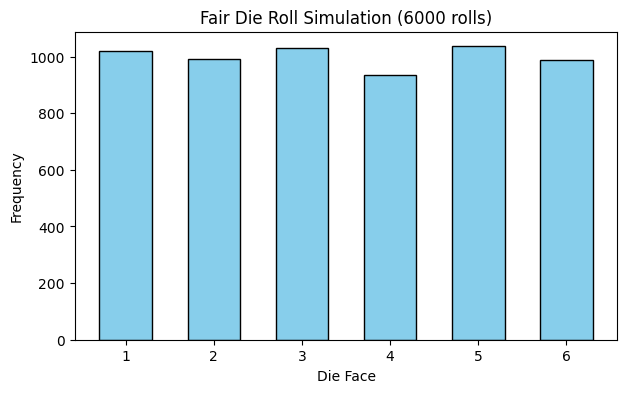

Observed Probabilities:
Face 1: 0.170
Face 2: 0.165
Face 3: 0.172
Face 4: 0.156
Face 5: 0.173
Face 6: 0.165

Theoretical Probability:
Each face: 0.1667 (~0.167)


In [5]:
# Problem 2: Simulate rolling a fair die 6000 times.

# Plot the histogram of outcomes.

# Compute observed probabilities of each face (1–6).

# Compare with the theoretical probability (1/6 ≈ 0.1667).


import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
n_rolls = 6000
faces = np.arange(1, 7)  # die faces 1–6

# Simulate die rolls
rolls = np.random.choice(faces, size=n_rolls, p=[1/6]*6)

# Count outcomes
counts = np.bincount(rolls, minlength=7)[1:]  # skip index 0
observed_probs = counts / n_rolls

# Plot histogram
plt.figure(figsize=(7, 4))
plt.bar(faces, counts, color="skyblue", edgecolor="black", width=0.6)
plt.xticks(faces)
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.title("Fair Die Roll Simulation (6000 rolls)")
plt.show()

# Print comparison
print("Observed Probabilities:")
for face, prob in zip(faces, observed_probs):
    print(f"Face {face}: {prob:.3f}")
    
print("\nTheoretical Probability:")
print(f"Each face: {1/6:.4f} (~0.167)")


# Simulates 6000 rolls of a fair die.

# Computes the frequency and probability of each face.

# Plots a bar chart histogram of outcomes.

# Prints observed vs theoretical probabilities (≈ 0.167).


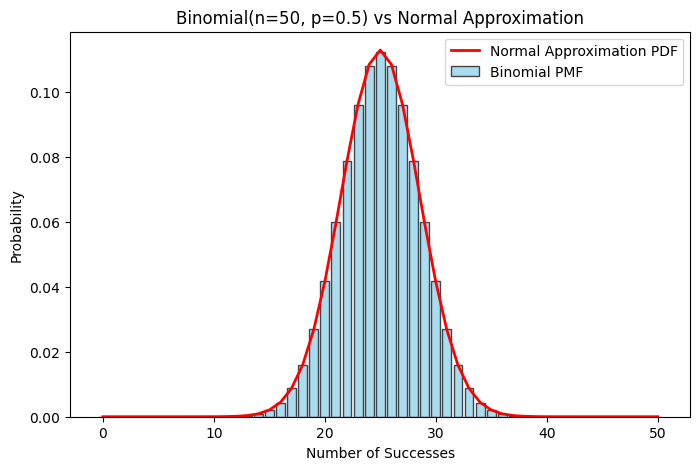

In [7]:
# Problem 3:
# For n=50 trials with success probability p=0.5:

# Plot the binomial probability mass function (pmf).

# Compare it with the corresponding normal distribution approximation.


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parameters
n = 50
p = 0.5

# Binomial distribution
x = np.arange(0, n + 1)
binom_pmf = binom.pmf(x, n, p)

# Normal approximation (mean = n*p, variance = n*p*(1-p))
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
normal_pdf = norm.pdf(x, mu, sigma)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x, binom_pmf, color="skyblue", edgecolor="black", alpha=0.7, label="Binomial PMF")
plt.plot(x, normal_pdf, "r-", lw=2, label="Normal Approximation PDF")

plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title(f"Binomial(n={n}, p={p}) vs Normal Approximation")
plt.legend()
plt.show()


### Explanation

**Binomial PMF:**  
`binom.pmf(x, n, p)` gives the exact probabilities for the binomial distribution.

**Normal Approximation:**

- Mean:  
  \[
  \mu = n p = 50 \times 0.5 = 25
  \]

- Standard Deviation:  
  \[
  \sigma = \sqrt{n p (1 - p)} = \sqrt{50 \times 0.5 \times 0.5} = \sqrt{12.5} \approx 3.536
  \]

For large \( n \) and \( p \) not too close to 0 or 1, the **binomial distribution** is well-approximated by the **normal distribution**.


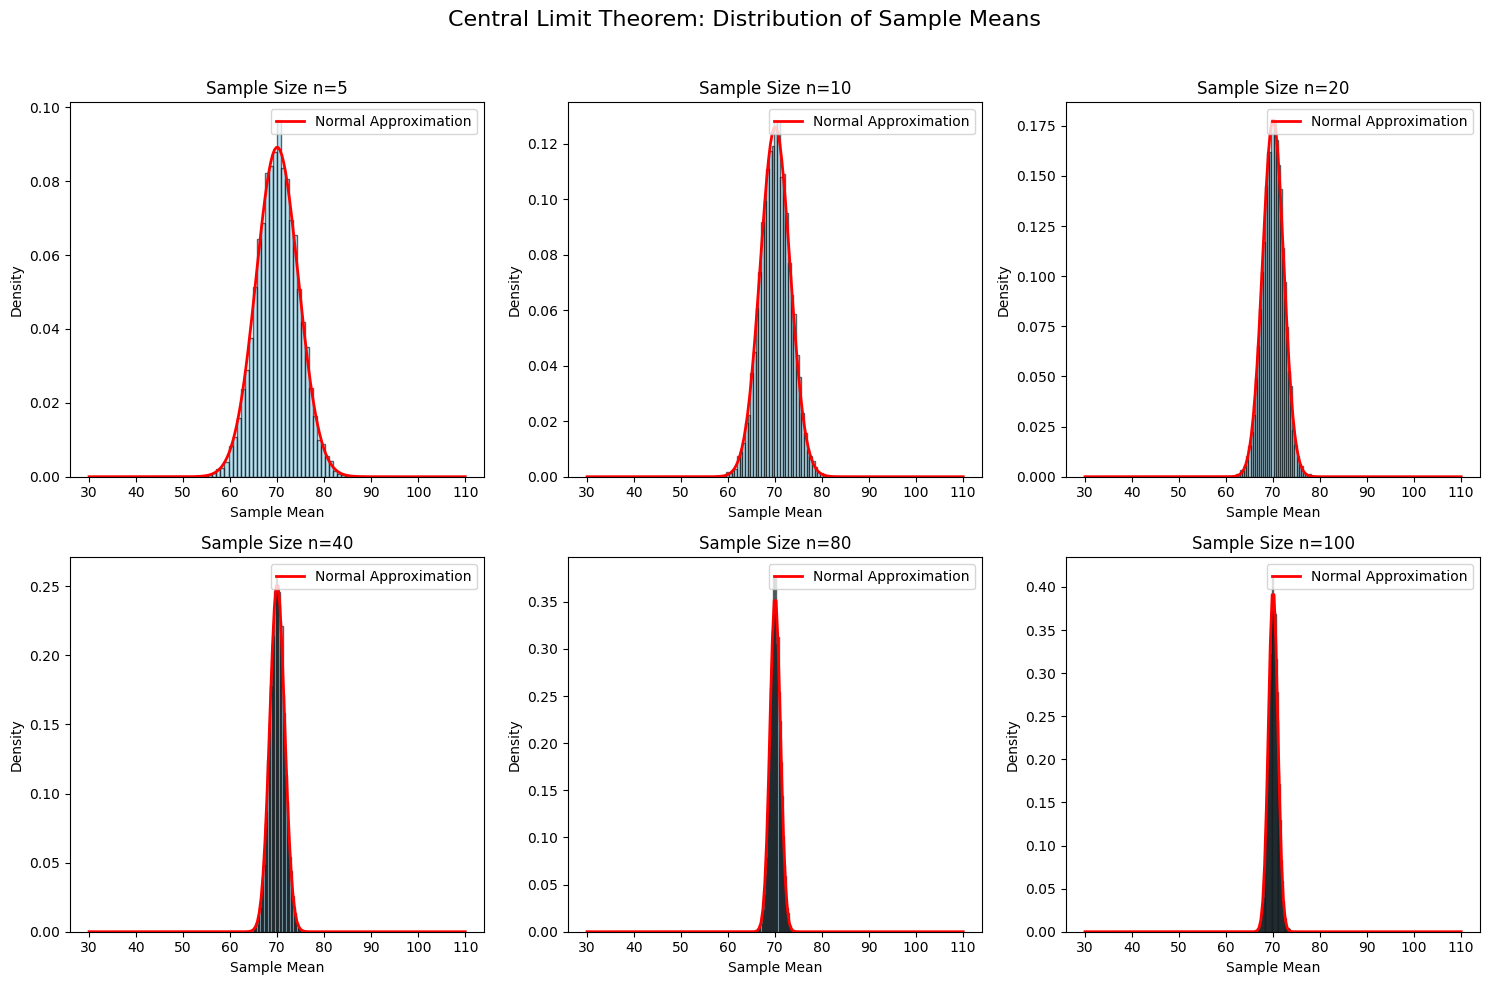

In [8]:
# Problem 4:
# A population of people has weights that are normally distributed with mean 70 kg and standard deviation 10 kg.

# Tasks:
# Randomly select 10 values from this population and compute the sample mean.

# Repeat this sampling 10,000 times and plot the distribution (histogram) of the sample means.

# Repeat the above steps for sample sizes: 5, 10, 20, 40, 80, 100.

# For each sample size, overlay a normal distribution with:

# Mean = 70

# Standard deviation = 10 / √(sample size)

# Compare how the distribution of sample means changes with sample size and how it approaches a normal distribution.




import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population parameters
mu = 70      # population mean
sigma = 10   # population standard deviation

# Sample sizes to test
sample_sizes = [5, 10, 20, 40, 80, 100]
n_simulations = 10000

plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes, 1):
    # Simulate: draw n samples 10,000 times and compute sample means
    sample_means = [np.mean(np.random.normal(mu, sigma, n)) for _ in range(n_simulations)]

    # Plot histogram of sample means
    plt.subplot(2, 3, i)
    plt.hist(sample_means, bins=40, density=True, alpha=0.6, color="skyblue", edgecolor="black")

    # Overlay normal distribution with mean=70, std = sigma / sqrt(n)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
    plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(n)), "r-", lw=2, label="Normal Approximation")

    plt.title(f"Sample Size n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Central Limit Theorem: Distribution of Sample Means", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Explanation: Central Limit Theorem (CLT) Simulation

We consider a population with weights that follow a **Normal distribution**:

\[
X \sim \mathcal{N}(\mu = 70, \sigma = 10)
\]

#### Steps:
1. For each sample size \(n = 5, 10, 20, 40, 80, 100\):
   - Randomly select \(n\) values from the population.
   - Compute the **sample mean**.
   - Repeat this process 10,000 times to build a distribution of sample means.

2. The distribution of these sample means is plotted as a histogram.

3. We overlay a **normal distribution** with:
   - Mean = 70  
   - Standard Deviation = \(\frac{\sigma}{\sqrt{n}} = \frac{10}{\sqrt{n}}\)

#### Observations:
- As \(n\) increases, the distribution of sample means becomes more **concentrated around 70**.
- The spread (standard deviation) of the sample means decreases as \(\frac{1}{\sqrt{n}}\).
- For larger \(n\), the histogram closely matches the overlaid normal curve, confirming the **Central Limit Theorem**.


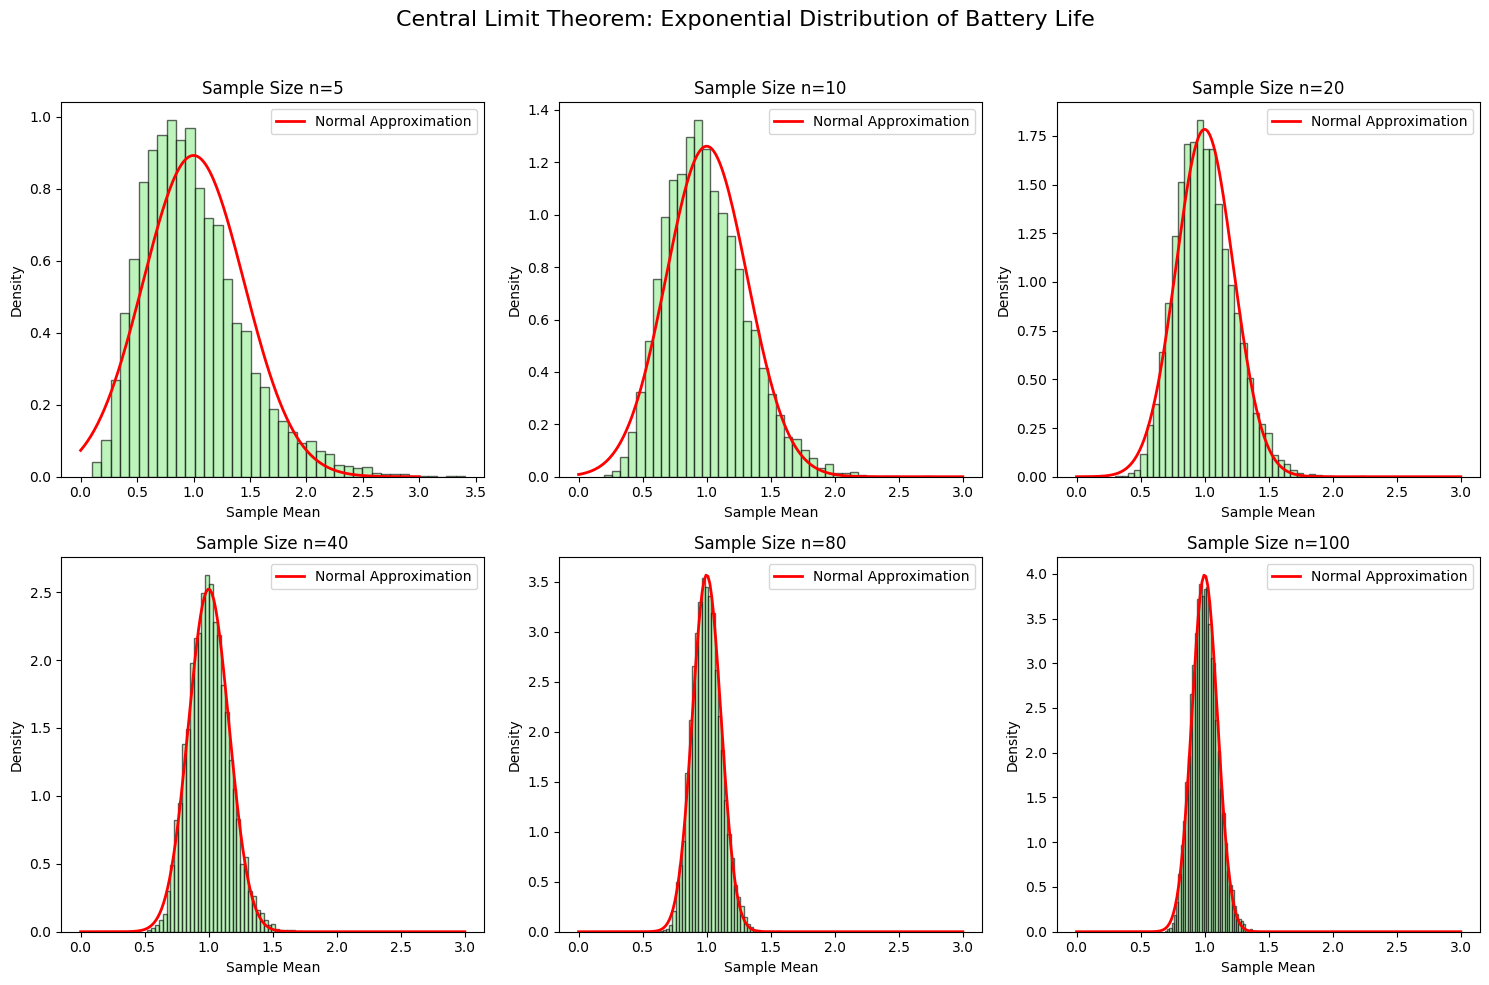

In [9]:
# switching to the exponential distribution highlights the Central Limit Theorem even more
# clearly because the underlying population is not normal.

# Problem:

# Consider the last problem above. Repeat the analysis with an exponential distribution. These illustrate the Central Limit Theorem that the sample mean goes towards a normal distribution.

# The life of a battery has an exponential distribution with the single parameter 
#  , i.e. np.random.exponential(scale=1)

# Randomly select 10 values from this population and compute the sample mean.

# Repeat this sampling 10,000 times and plot the distribution (histogram) of the sample means.

# Repeat the above steps for sample sizes: 5, 10, 20, 40, 80, 100.

# For each sample size, overlay a normal distribution with:

# Mean = 1

# Standard deviation = 1 / √(sample size)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population parameters for exponential distribution
scale = 1.0   # mean of exponential = 1/λ, here λ=1 → mean=1
mu = 1        # theoretical mean
sigma = 1     # theoretical std (same as mean for exponential with λ=1)

# Sample sizes to test
sample_sizes = [5, 10, 20, 40, 80, 100]
n_simulations = 10000

plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes, 1):
    # Simulate: draw n samples 10,000 times and compute sample means
    sample_means = [np.mean(np.random.exponential(scale=scale, size=n)) for _ in range(n_simulations)]

    # Plot histogram of sample means
    plt.subplot(2, 3, i)
    plt.hist(sample_means, bins=40, density=True, alpha=0.6, color="lightgreen", edgecolor="black")

    # Overlay normal distribution with mean=1, std = 1/sqrt(n)
    x = np.linspace(0, 3, 200)
    plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(n)), "r-", lw=2, label="Normal Approximation")

    plt.title(f"Sample Size n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Central Limit Theorem: Exponential Distribution of Battery Life", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

    

### Central Limit Theorem with Exponential Distribution

We now consider a **non-normal population**: battery life following an **Exponential distribution** with rate parameter \(\lambda = 1\).

\[
X \sim \text{Exponential}(\lambda = 1), \quad \mu = 1, \quad \sigma = 1
\]

#### Steps:
1. For each sample size \(n = 5, 10, 20, 40, 80, 100\):
   - Randomly select \(n\) values from the exponential distribution.
   - Compute the **sample mean**.
   - Repeat this 10,000 times to build a distribution of sample means.

2. Plot a histogram of the sample means.

3. Overlay a **Normal distribution** with:
   - Mean = 1  
   - Standard deviation = \(\frac{1}{\sqrt{n}}\)

#### Observations:
- Even though the **underlying distribution is skewed (exponential)**, the distribution of **sample means** becomes more symmetric and approaches a **Normal distribution** as \(n\) increases.
- The spread of sample means decreases at the rate of \(\frac{1}{\sqrt{n}}\).
- This illustrates the **Central Limit Theorem** in action: regardless of the original distribution, the sample mean tends to follow a normal distribution for sufficiently large \(n\).




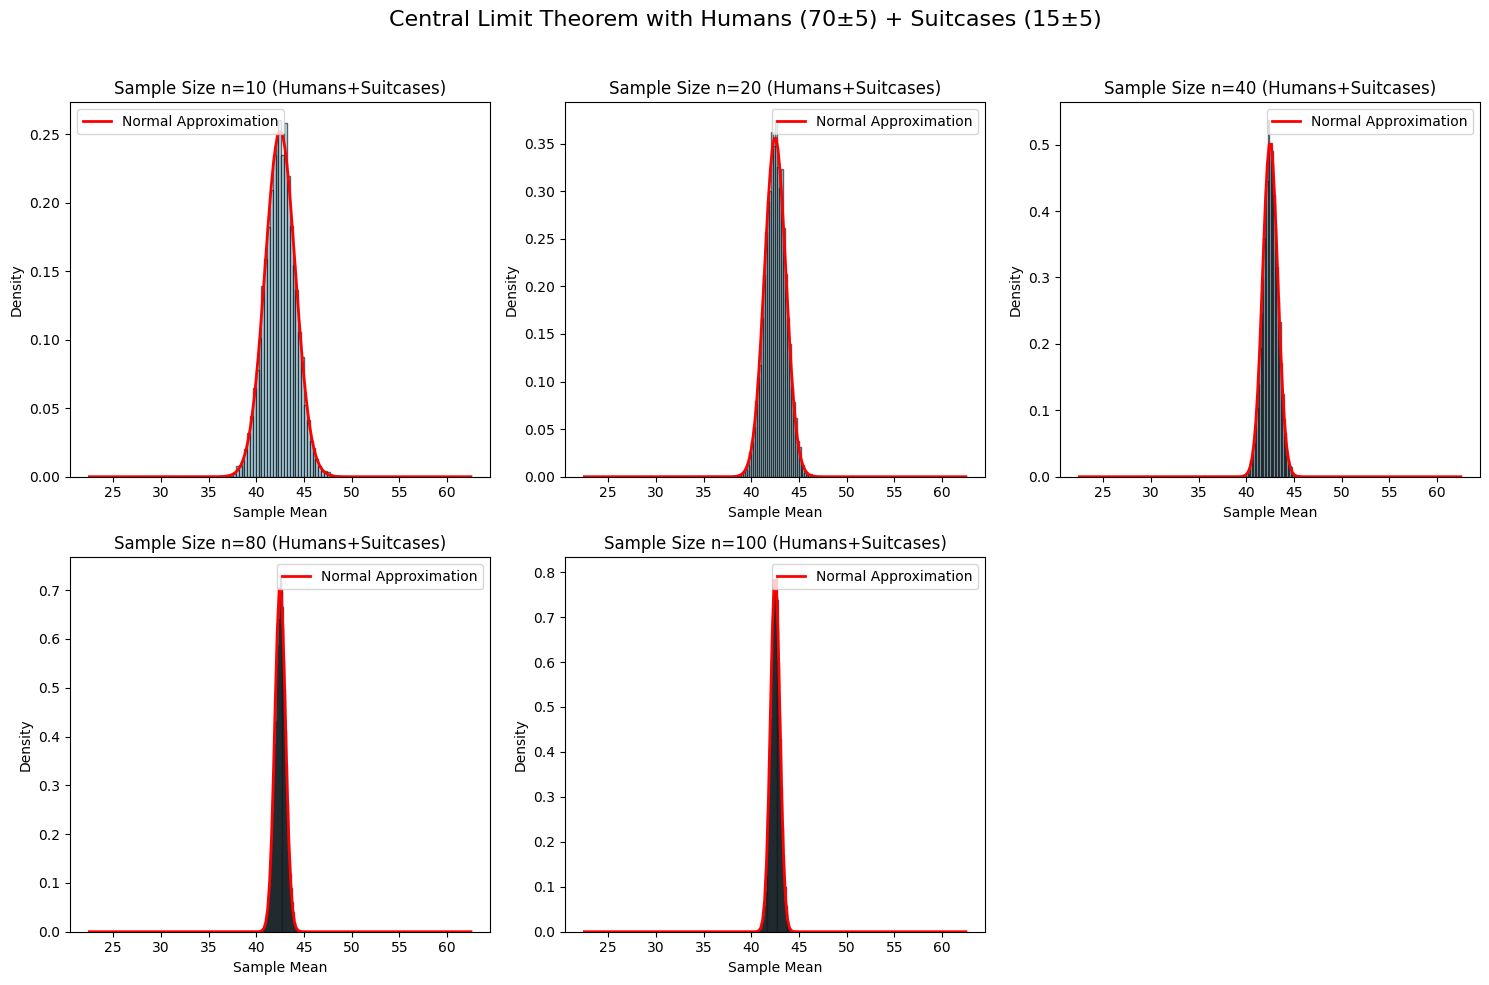

In [10]:
# Problem 2
# Consider a population consisting of human beings and a single suitcase taken with them as checkin baggage. Let us say that the weight of the humans are distributed normally with mean 70kgs and standard deviation 5 kgs and the bags are with mean 15 kgs and standard deviation 5 kgs.

# Now, randomly select 5 values from each of the humans and suitcases to get 10 weights. Now find the sample mean of the weights.

# Repeat this sampling 10,000 times and plot the distribution (histogram) of the sample means of the humans and suitcases.

# Repeat the above steps for sample sizes: 10, 20, 40, 80, 100 (i.e. 5+5, 10+10 etc. of human+suitcases).

# For each sample size, overlay a normal distribution with:

# Mean = 42.5

# Standard deviation = 5 / √(sample size)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population parameters
mu_h, sigma_h = 70, 5   # humans
mu_b, sigma_b = 15, 5   # suitcases

# Combined mean and formula for std (given)
mu = (mu_h + mu_b) / 2  # 42.5
sigma = 5               # base std

# Sample sizes (total = humans + suitcases, e.g. 5+5=10, 10+10=20, ...)
sample_sizes = [10, 20, 40, 80, 100]
n_simulations = 10000

plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes, 1):
    half_n = n // 2  # split equally between humans and bags

    # Simulate sample means
    sample_means = []
    for _ in range(n_simulations):
        humans = np.random.normal(mu_h, sigma_h, half_n)
        bags = np.random.normal(mu_b, sigma_b, half_n)
        combined = np.concatenate([humans, bags])
        sample_means.append(np.mean(combined))
    sample_means = np.array(sample_means)

    # Plot histogram of sample means
    plt.subplot(2, 3, i)
    plt.hist(sample_means, bins=40, density=True, alpha=0.6,
             color="skyblue", edgecolor="black")

    # Overlay normal distribution with mean=42.5, std=5/sqrt(n)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
    plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(n)), "r-", lw=2,
             label="Normal Approximation")

    plt.title(f"Sample Size n={n} (Humans+Suitcases)")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Central Limit Theorem with Humans (70±5) + Suitcases (15±5)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



### Central Limit Theorem with Two Populations (Humans + Suitcases)

We consider a mixed population:

- Humans: \( \mathcal{N}(70, 5^2) \)  
- Suitcases: \( \mathcal{N}(15, 5^2) \)  

We draw **equal samples** from both populations (e.g., 5 humans + 5 bags = 10 total).

#### Theoretical Distribution of the Sample Mean
- Mean:
  \[
  \mu = \frac{70 + 15}{2} = 42.5
  \]
- Standard Deviation of the sample mean:
  \[
  \sigma = \frac{5}{\sqrt{n}}
  \]
  where \(n\) = total sample size (humans + suitcases).

#### Simulation Steps
1. For each sample size \(n = 10, 20, 40, 80, 100\):
   - Randomly select \(n/2\) humans and \(n/2\) suitcases.
   - Compute the sample mean.
   - Repeat this 10,000 times to form the distribution of sample means.

2. Plot the histogram of the sample means.

3. Overlay the corresponding **Normal distribution** with:
   - Mean = 42.5
   - Std Dev = \(5/\sqrt{n}\)

#### Observations
- As sample size increases, the distribution of sample means becomes narrower and approaches the theoretical normal curve.
- This illustrates the **Central Limit Theorem**: even when combining two different normal populations, the distribution of the sample mean is well-approximated by a normal distribution.
